# Financial Ananlysis and Expense Management for Hostelers
#### Prepared By: Anand Soni (CSE), Neha Gupta (ECE) and, Vivek Nigam (Mathematics & Computing).
    
The aim of this project is to
* Perform Exploratory Data Analysis over the monthly expenditure of Hostelers.
* Predict spending trends.
* Predict Monthly Savings and Total expenses out of Monthly Allowance based on their spending trend.

The project is prepared using **Ananconda©** Distribution of **Python36**, the modules used were,
* Pandas
* Numpy
* Matplotlib
* Seaborn
* SciKit Learn (sklearn)
* StatsModels (_Ordinary Least Squares Report to Optimize the model_)

### Importing the usual suspects
Python Modules for Data Analysis

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset
The dataset was collected by some real hostelers using Google© Forms and exported as a **.csv** file.
We will import the dataset named _EXPENDITURE MANAGEMENT SURVEY.csv_ and see the fields using the **.head()** function of Pandas module.

In [92]:
dataset = pd.read_csv('EXPENDITURE MANAGEMENT SURVEY.csv')
dataset.head()

,Timestamp,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.,Miscellaneous Categories
0,2018/12/28 7:05:52 PM GMT+5:30,8000,2000,1000,1000,1000,2000,1500,NaN
1,2018/12/28 7:38:36 PM GMT+5:30,-45624624526,-5462465,-24652426,-2465245,-24562456254,-2465465,-24562465,jyagtrfowuifbowiuar
2,2018/12/28 7:39:01 PM GMT+5:30,-617786,-65818,-7439861,-1698431,-15368,-51375,-33178,uafyhweiufhoaiuwe
3,2018/12/28 7:41:40 PM GMT+5:30,6900,696969,6699,9696969,666,999,6969,06-Sep
4,2018/12/28 7:51:33 PM GMT+5:30,1000,300,0,200,0,0,100,Copies and pens


**Looking at the full dataset:** <br>
As the data looks a bit odd on the overview of the first 5 values, we'll have a look over the data to find
out the fields and values they store.

In [93]:
dataset

,Timestamp,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.,Miscellaneous Categories
0,2018/12/28 7:05:52 PM GMT+5:30,8000,2000,1000,1000,1000,2000,1500,NaN
1,2018/12/28 7:38:36 PM GMT+5:30,-45624624526,-5462465,-24652426,-2465245,-24562456254,-2465465,-24562465,jyagtrfowuifbowiuar
2,2018/12/28 7:39:01 PM GMT+5:30,-617786,-65818,-7439861,-1698431,-15368,-51375,-33178,uafyhweiufhoaiuwe
3,2018/12/28 7:41:40 PM GMT+5:30,6900,696969,6699,9696969,666,999,6969,06-Sep
4,2018/12/28 7:51:33 PM GMT+5:30,1000,300,0,200,0,0,100,Copies and pens
5,2018/12/28 8:13:58 PM GMT+5:30,3000,500,100,400,300,300,500,NaN
6,2018/12/28 8:42:03 PM GMT+5:30,3500,1000,500,500,200,1001,299,Rishvat😂
7,2018/12/28 10:32:21 PM GMT+5:30,2000,4000,500,500,1000,0,0,NaN
8,2018/12/28 10:35:24 PM GMT+5:30,5000,2000,1200,500,300,400,600,NaN
9,2018/12/28 10:36:59 PM GMT+5:30,2000,1500,0,500,0,0,0,None


### Overview of the data
The data contains:
* Many **NaN** Values which need to be taken care of
* Some fields like *Timestamp*, *Miscellaneous Categories*, which don't help us in our analysis.
* Some highly negative values which need to be discarded because they are not useful and will unneccessarily affect our results, they need to be removed.
* Some rows with all zero values, they are irrelevant and need to be cleaned.
* By common sense we can observe some unexpected high values for fields like *Monthly Allowance* they will be **outliers** for our data. They need to be removed.

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
Timestamp                   36 non-null object
Monthly Allowance           36 non-null int64
Food                        36 non-null int64
Travel                      36 non-null int64
Shopping                    36 non-null int64
Entertainment               36 non-null int64
Friends/relationships       36 non-null int64
Miscellaneous.              36 non-null int64
Miscellaneous Categories    16 non-null object
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


### Cleaning of Data

By the overview of the data and the fields we gathered information about what needs to be taken care of in our data and what needs to be cleaned.
<br>
The first thing we need to do is to _remove the string fields_ and then set the range for the data which seems **legit** and not something which disturbs our whole data. 
By some rules:
* The outliers in every field must be removed.
* The outlier records must be removed.

**1. Removing the String fields**

In [95]:
dataset.drop(['Timestamp', 'Miscellaneous Categories'], axis=1, inplace=True)

In [96]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.
0,8000,2000,1000,1000,1000,2000,1500
1,-45624624526,-5462465,-24652426,-2465245,-24562456254,-2465465,-24562465
2,-617786,-65818,-7439861,-1698431,-15368,-51375,-33178
3,6900,696969,6699,9696969,666,999,6969
4,1000,300,0,200,0,0,100
5,3000,500,100,400,300,300,500
6,3500,1000,500,500,200,1001,299
7,2000,4000,500,500,1000,0,0
8,5000,2000,1200,500,300,400,600
9,2000,1500,0,500,0,0,0


**2. Removing the outliers**

Using some concepts of statistics like **Upper and Lower Quartile** calculation, normally the upper quartile (*Q3*) is defined by the upper 75% values of the data, and lower quartile (*Q1*) denotes the lower 25% values of the data, but we'll use this **similar concept** to remove the extreme outlier values, which were filled maybe by mistake or by mischief. <br>
Here we use hit-and-trial on values to find the Inter Quartile Range,

In [97]:
Q1 = dataset.quantile(0.06)
Q1

Monthly Allowance        100.0
Food                      30.0
Travel                     0.0
Shopping                   0.0
Entertainment              0.0
Friends/relationships      0.0
Miscellaneous.             0.0
Name: 0.06, dtype: float64

In [98]:
Q3 = dataset.quantile(0.90)
Q3

Monthly Allowance        10000.0
Food                      6000.0
Travel                    2000.0
Shopping                  3250.0
Entertainment             1000.0
Friends/relationships     1500.5
Miscellaneous.            3000.0
Name: 0.9, dtype: float64

In [99]:
IQR = Q3 - Q1

In [100]:
mask = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
dataset[mask] = np.nan

In [101]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.
0,8000.0,2000.0,1000.0,1000.0,1000.0,2000.0,1500.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6900.0,NaN,NaN,NaN,666.0,999.0,6969.0
4,1000.0,300.0,0.0,200.0,0.0,0.0,100.0
5,3000.0,500.0,100.0,400.0,300.0,300.0,500.0
6,3500.0,1000.0,500.0,500.0,200.0,1001.0,299.0
7,2000.0,4000.0,500.0,500.0,1000.0,0.0,0.0
8,5000.0,2000.0,1200.0,500.0,300.0,400.0,600.0
9,2000.0,1500.0,0.0,500.0,0.0,0.0,0.0


In [102]:
dataset.dropna(axis=0, inplace=True)

In [103]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.
0,8000.0,2000.0,1000.0,1000.0,1000.0,2000.0,1500.0
4,1000.0,300.0,0.0,200.0,0.0,0.0,100.0
5,3000.0,500.0,100.0,400.0,300.0,300.0,500.0
6,3500.0,1000.0,500.0,500.0,200.0,1001.0,299.0
7,2000.0,4000.0,500.0,500.0,1000.0,0.0,0.0
8,5000.0,2000.0,1200.0,500.0,300.0,400.0,600.0
9,2000.0,1500.0,0.0,500.0,0.0,0.0,0.0
10,3500.0,2500.0,500.0,200.0,0.0,200.0,100.0
11,10000.0,6000.0,0.0,3000.0,0.0,0.0,1000.0
12,10000.0,3000.0,1000.0,1000.0,0.0,1000.0,1000.0


**NOTE:** We see that one record is holding all zeros that can be removed manually in this data

In [104]:
dataset.drop([21], axis=0, inplace=True)

In [105]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.
0,8000.0,2000.0,1000.0,1000.0,1000.0,2000.0,1500.0
4,1000.0,300.0,0.0,200.0,0.0,0.0,100.0
5,3000.0,500.0,100.0,400.0,300.0,300.0,500.0
6,3500.0,1000.0,500.0,500.0,200.0,1001.0,299.0
7,2000.0,4000.0,500.0,500.0,1000.0,0.0,0.0
8,5000.0,2000.0,1200.0,500.0,300.0,400.0,600.0
9,2000.0,1500.0,0.0,500.0,0.0,0.0,0.0
10,3500.0,2500.0,500.0,200.0,0.0,200.0,100.0
11,10000.0,6000.0,0.0,3000.0,0.0,0.0,1000.0
12,10000.0,3000.0,1000.0,1000.0,0.0,1000.0,1000.0


### Inferering some relevant information

From the given observations we can also infer some relevant information like **Monthly Total Expense** and **Monthly Savings**. This is the information we'll be needing in our training and testing dataset when we train our Machine Learning Model.

In [106]:
dataset['Total Expense'] = dataset.iloc[: , 1:7].sum(axis=1)

In [107]:
dataset['Savings'] = dataset['Monthly Allowance']-dataset['Total Expense']

In [108]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.,Total Expense,Savings
0,8000.0,2000.0,1000.0,1000.0,1000.0,2000.0,1500.0,8500.0,-500.0
4,1000.0,300.0,0.0,200.0,0.0,0.0,100.0,600.0,400.0
5,3000.0,500.0,100.0,400.0,300.0,300.0,500.0,2100.0,900.0
6,3500.0,1000.0,500.0,500.0,200.0,1001.0,299.0,3500.0,0.0
7,2000.0,4000.0,500.0,500.0,1000.0,0.0,0.0,6000.0,-4000.0
8,5000.0,2000.0,1200.0,500.0,300.0,400.0,600.0,5000.0,0.0
9,2000.0,1500.0,0.0,500.0,0.0,0.0,0.0,2000.0,0.0
10,3500.0,2500.0,500.0,200.0,0.0,200.0,100.0,3500.0,0.0
11,10000.0,6000.0,0.0,3000.0,0.0,0.0,1000.0,10000.0,0.0
12,10000.0,3000.0,1000.0,1000.0,0.0,1000.0,1000.0,7000.0,3000.0


**INFERENCE** <br> 
* We see that some people are able to save money while the others are in some debt per month _(indicated by their negative balance)_
* The Savings were calculated by the formula _**Savings = Monthly Allowance - Total Expense**_
* The debt is generally added to the next month's expenditure or we can also add it to next month's allowance. **Technically**, the negative savings can be called as *Debt* which will be added to next month's expenses and the Posivitve Savings are the _real savings_, which are generally added to the next month's allowance.

In [109]:
dataset['Debt'] = -dataset['Savings']

In [110]:
dataset[dataset<=0] = 0

In [111]:
dataset

,Monthly Allowance,Food,Travel,Shopping,Entertainment,Friends/relationships,Miscellaneous.,Total Expense,Savings,Debt
0,8000.0,2000.0,1000.0,1000.0,1000.0,2000.0,1500.0,8500.0,0.0,500.0
4,1000.0,300.0,0.0,200.0,0.0,0.0,100.0,600.0,400.0,0.0
5,3000.0,500.0,100.0,400.0,300.0,300.0,500.0,2100.0,900.0,0.0
6,3500.0,1000.0,500.0,500.0,200.0,1001.0,299.0,3500.0,0.0,0.0
7,2000.0,4000.0,500.0,500.0,1000.0,0.0,0.0,6000.0,0.0,4000.0
8,5000.0,2000.0,1200.0,500.0,300.0,400.0,600.0,5000.0,0.0,0.0
9,2000.0,1500.0,0.0,500.0,0.0,0.0,0.0,2000.0,0.0,0.0
10,3500.0,2500.0,500.0,200.0,0.0,200.0,100.0,3500.0,0.0,0.0
11,10000.0,6000.0,0.0,3000.0,0.0,0.0,1000.0,10000.0,0.0,0.0
12,10000.0,3000.0,1000.0,1000.0,0.0,1000.0,1000.0,7000.0,3000.0,0.0


### Exploratory Data Analysis : Data Visualization

We will perform some exploratory data analysis <br> It will help us visualize the data much better. We will use **Seaborn and Matplotlib.pyplot** modules for this. <br>
The first thing is to set the size of the graphs and figures to something we can see with ease.

In [113]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

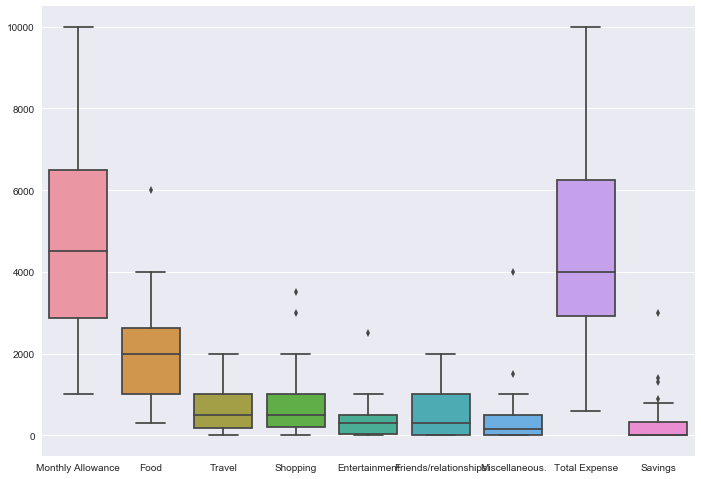

In [137]:
sns.boxplot(data=dataset.iloc[: , :-1])

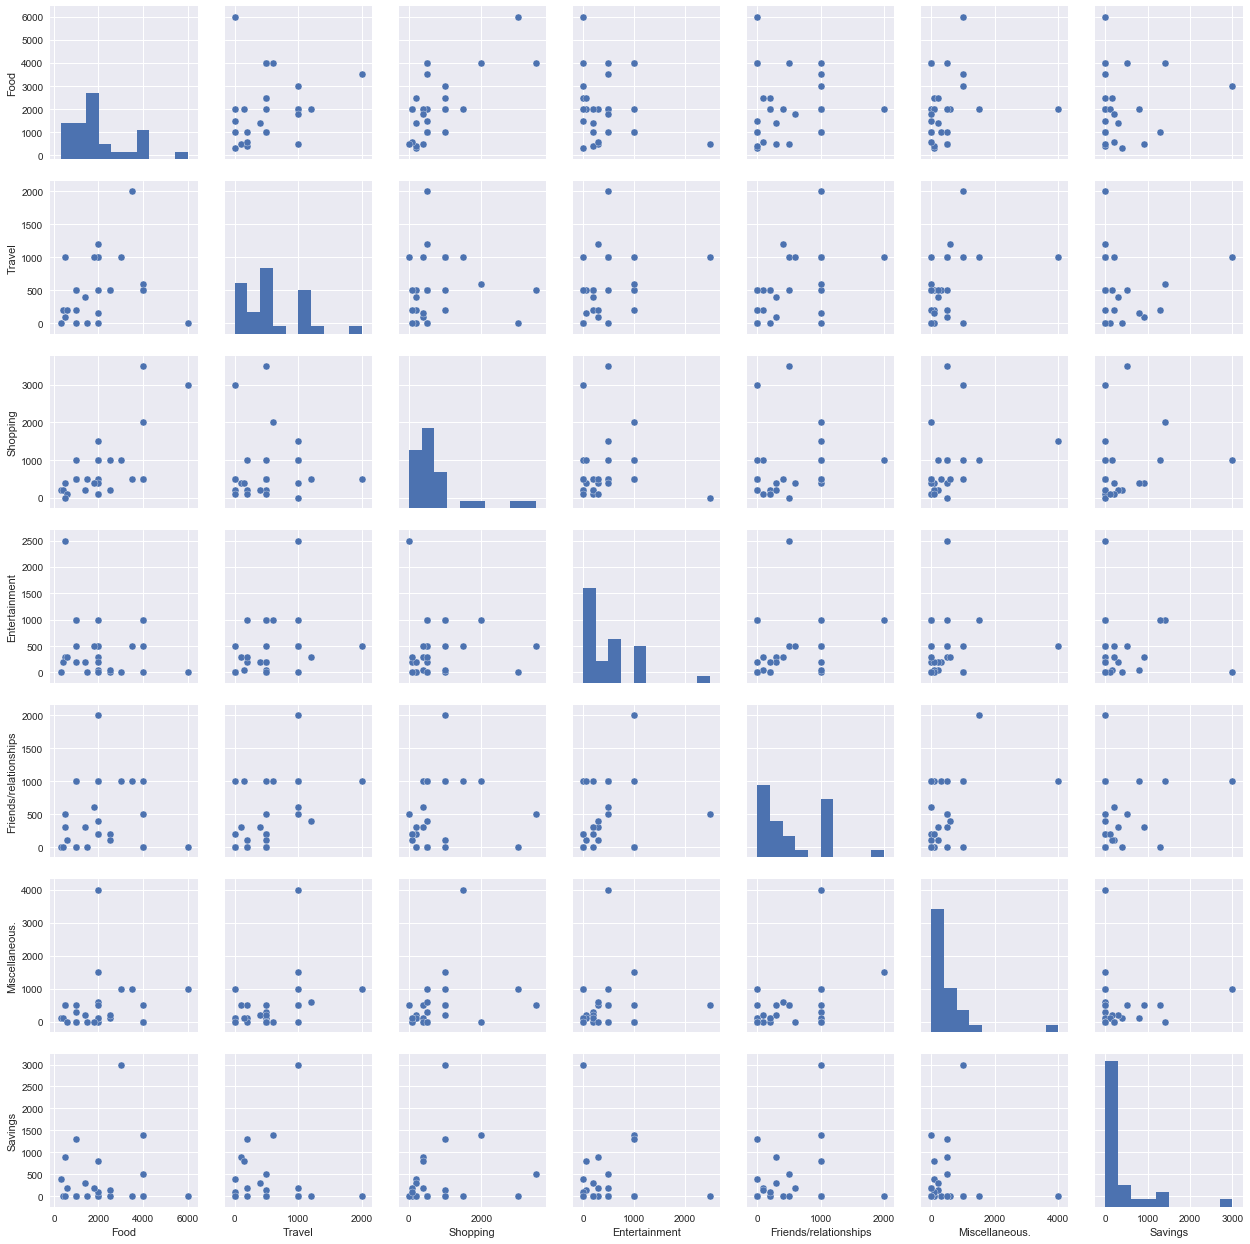

In [138]:
sns.pairplot(dataset.drop(['Monthly Allowance', 'Debt', 'Total Expense'], axis=1), size=2.5)

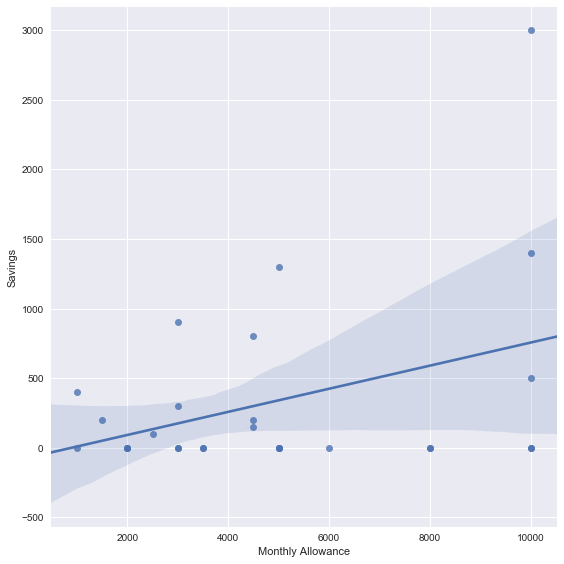

In [139]:
sns.lmplot(x='Monthly Allowance',y='Savings',data=dataset, size=8, palette='pastel')

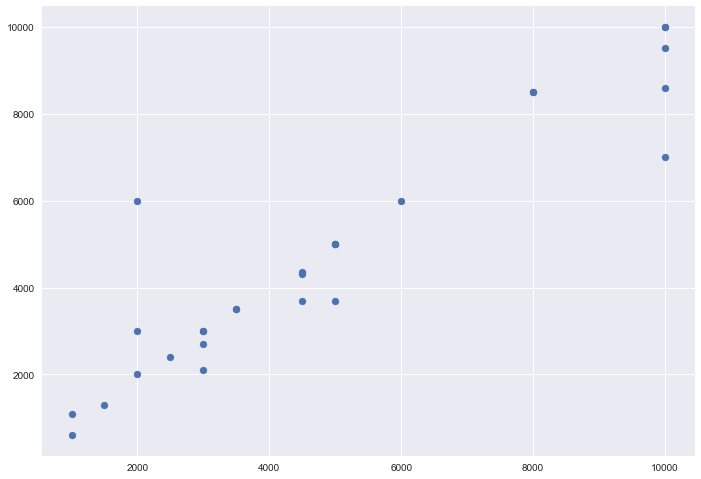

In [140]:
plt.scatter(x=dataset['Monthly Allowance'], y=dataset['Total Expense'])

### Train-Test Split
The **Savings** depends upon the factors where the hosteller spends the money like **Food, Entertainment, Shopping, Travel, Relationships and, some miscellaneous** categories.

In [141]:
X = dataset[['Food','Travel','Shopping','Entertainment','Friends/relationships','Miscellaneous.']]

In [142]:
y = dataset['Savings']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Model

Now its time to train our model on our training data!

** Importing LinearRegression from sklearn.linear_model **

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
lm = LinearRegression()

In [147]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [148]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.01962603 -0.28111606  0.20191684  0.21423558  0.13972928 -0.08527661]


### Predicting Test Data
Now that we have fit our model, we need to evaluate its performance by predicting off the test values.

In [153]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

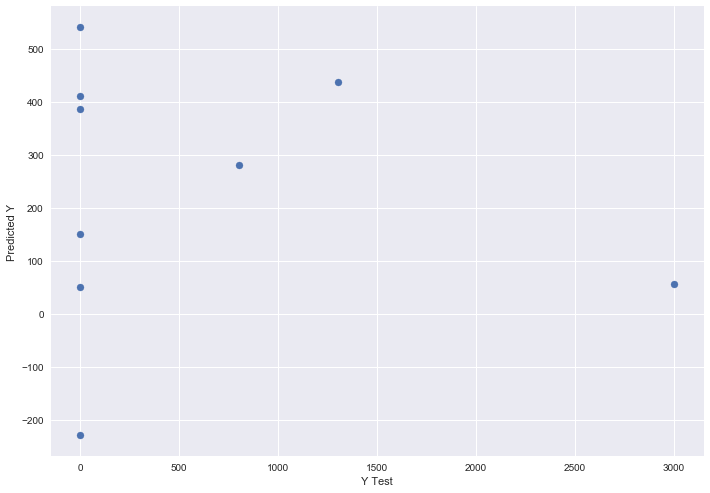

In [150]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**NOTE:** We see a relation between the `Y_Test` and the `Predicted_Y` values with the above graph.

### Predicting the error in our model

In statistics, and in Machine Learning, for Regression models, we use 

In [151]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 677.323575056832
MSE: 1152761.3647929684
RMSE: 1073.6672504984813


In [129]:
import statsmodels.formula.api as sm
X_opt = X[['Shopping','Friends/relationships']]
OptimizedModel = sm.OLS(endog=y, exog=X_opt).fit()
OptimizedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Savings   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.115
Date:                Mon, 31 Dec 2018   Prob (F-statistic):             0.0280
Time:                        02:35:26   Log-Likelihood:                -220.29
No. Observations:                  28   AIC:                             444.6
Df Residuals:                      26   BIC:                             447.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Shopping                  0.1867      0.133      1.408      0.171      -0.086       0.459
Friends/relationships     0.2812      0.215      1.306      0.203      -0.161       0.724
==============================================================================
Omnibus:                       30.423   Durbin-Watson:                   2.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.227
Skew:                           2.250   Prob(JB):                     1.53e-15
Kurtosis:                       9.183   Cond. No.                         2.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=42)

In [131]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.17605804 0.03190682]


In [133]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

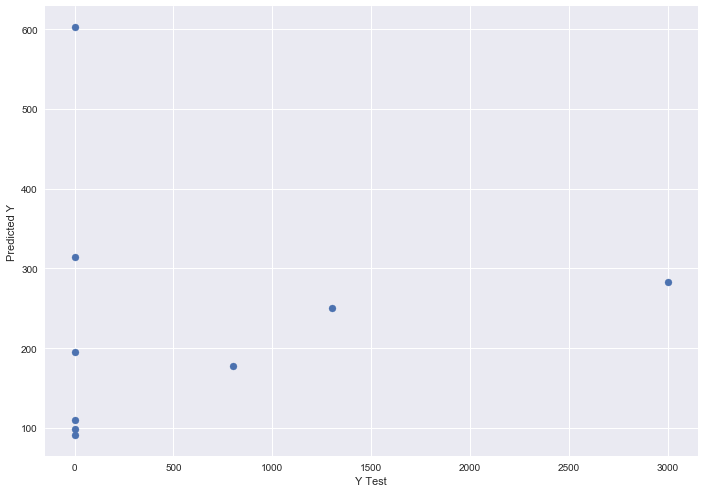

In [134]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [135]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 644.5873598138746
MSE: 1044715.4781895042
RMSE: 1022.1132413727474
